# Analogue Filters

GUID: 2663452m

## Abstract
This record details the procedure, results and anaylysis of several different analogue filters, starting with single pole low pass and high pass filters analysed with an oscilloscope and frequency response analyser, followed by cascaded filters using an operational amplifier as a buffer in between, analysis of a non inverting amplifier and finally an LCR filter with comparable frequency responses allowing for the comparison of the LCR circuit to the single pole low pass filter and the two cascaded low pass filters.

## Introduction and Background
Analogue filters are useful control systems that depending on there construction can filter about frequencies of a given value within a circuit this is desirable in a field such as audio technology in which one may want to remove a given frequency range from a speaker input to emphasise other frequencies such that used to create subwoofer or tweeter speakers. This technique can be used more genrally to remove noise from a signal paricularly noise in the low or high frequency ranges. In this experiment we will be looking at the construction of several different analogue filters and analysing their frequency responses as well as the effects of cascading filters and the use of operational amplifiers as buffers.

## Aims of this experiment
The aims of this experinent are to: 
1. Derive the transfer function of a single pole low and high pass filter, construct the two circuits and measure the gain and phase response as a function of frequency, and plot these results on bode and nyquist plots.
2. Calculate and obtain an understanding of the corner frequency and slope of the gain response for single and multi pole filters.
3. Construct casaded active filters using an operational amplifier as a buffer and analyse the frequency response of the cascaded filters.
4. Construct resonant filters (LCR circuits) and analyse the frequency response of the circuit and comparing it to the single pole low pass filter and the cascaded filters.

## Equipment

Equipment used in this experiment includes:
- Breadboard
- MOKU:GO and the MOKU:Lab software
- Resistors of various values
- Capacitors of various values
- Inductor of value $1\mu H$
- Operational amplifier (TL072)
- Multimeter

## Task 1 - Single pole low pass filter

### Task 1.1 - Deriving the transfer function of a single pole low pass filter
To calculate the transfer function (G) of a single pole low pass filter we can start from the definition of the transfer function:
$$G = \frac{V_{out}}{V_{in}} = \frac{Z_2}{Z_1+Z_2}$$
and using the circuit diagram of a single pole low pass filter we can see that:

$$Z_1 = R$$
$$Z_2 = \frac{1}{j\omega C}$$

where j is the imaginary unit and $\omega$ is the angular frequency of the input signal. Substituting these values into the transfer function we get:

$$G = \frac{\frac{1}{j\omega C}}{R+\frac{1}{j\omega C}}$$
and simplifying this expression we get:
$$G = \frac{1}{j\omega RC+1}$$

The gain of the circuit is the magnitude of the transfer function and the phase is the argument of the transfer function. The gain is given by:

$$|G| = \frac{1}{\sqrt{1+(\omega RC)^2}}$$

and the phase is given by:

$$\angle G = -\arctan(\omega RC)$$

### Task 1.2 - Constructing the single pole low pass filter
The circuit diagram for the single pole low pass filter is shown below:



using this circuit diagram the single pole low pass filter was constructed on a breadboard picking resistance and capaccitance values to give a corner frequency as close to 10kHz as possible (these values were $R = 15k\Omega$ and  $C = 0.82nF$). Thus giving a theoretical corner frequency of

$$f_c = \frac{1}{2\pi RC} = \frac{1}{2\pi * 1.5\times10^4 * 0.82\times10^{-9}} = 12.9k\Omega$$

### Task 1.3 - Measuring and analysing the gain and phase response of the single pole low pass filter
To measure the gain and phase response of the isngle pole low pass filter the MOKU:GO was used with the MOKU:LAB software. The output form this was a peak to peak voltage of the sine wave and a frequency range that the sine wave was swept over as well as a phase offset that was precalculated for each value of frequency by the MOKU:LAB software. These values were obtained using the measuremnets tab of the software and acheives the same result as reading off the graph. These values were then imported into python and plotted on a bode and nyquist plot. The code to do this is shown below along with the output graphs.

In [25]:
# Import packages and libraries that will be used throughout the experiment
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy import interpolate
import os
import pandas as pd
import csv
import re
import control
from scipy import signal

plt.style.use('../report.mplstyle')  # define a style sheet to use for all plots



In [26]:
files = os.listdir('data/')  #creates a list of all files in the directory


for file in files: #loops through all files in the directory
    if file.endswith('.csv'): #filters any .csv files into a seperate folder
        os.rename('data/'+file, 'data/moku_csv/'+file)

    elif file.endswith('.png'): #filters any .png files into a seperate folder
        os.rename('data/'+file, 'data/moku_images/'+file)

def float_array_convert(array): #converts strings to floats in an array
    return np.array([float(i) for i in array])

lp_data = pd.read_csv('data/csv/lp_data.csv',sep = ',') #reads in the csv files for the low pass and high pass filters
hp_data = pd.read_csv('data/csv/hp_data.csv',sep = ',')

lp_peak_to_peak, lp_phase, lp_freq = lp_data['peaktopeak'], lp_data['phase'], lp_data['frequency'] #assigns the columns of the data to variables
hp_peak_to_peak, hp_phase, hp_freq = hp_data['peaktopeak'], hp_data['phase'], hp_data['frequency']

lp_peak_to_peak, lp_phase, lp_freq = float_array_convert(lp_peak_to_peak), float_array_convert(lp_phase), float_array_convert(lp_freq) #converts the strings to floats in each array
hp_peak_to_peak, hp_phase, hp_freq = float_array_convert(hp_peak_to_peak), (float_array_convert(hp_phase))-np.pi/2, float_array_convert(hp_freq)


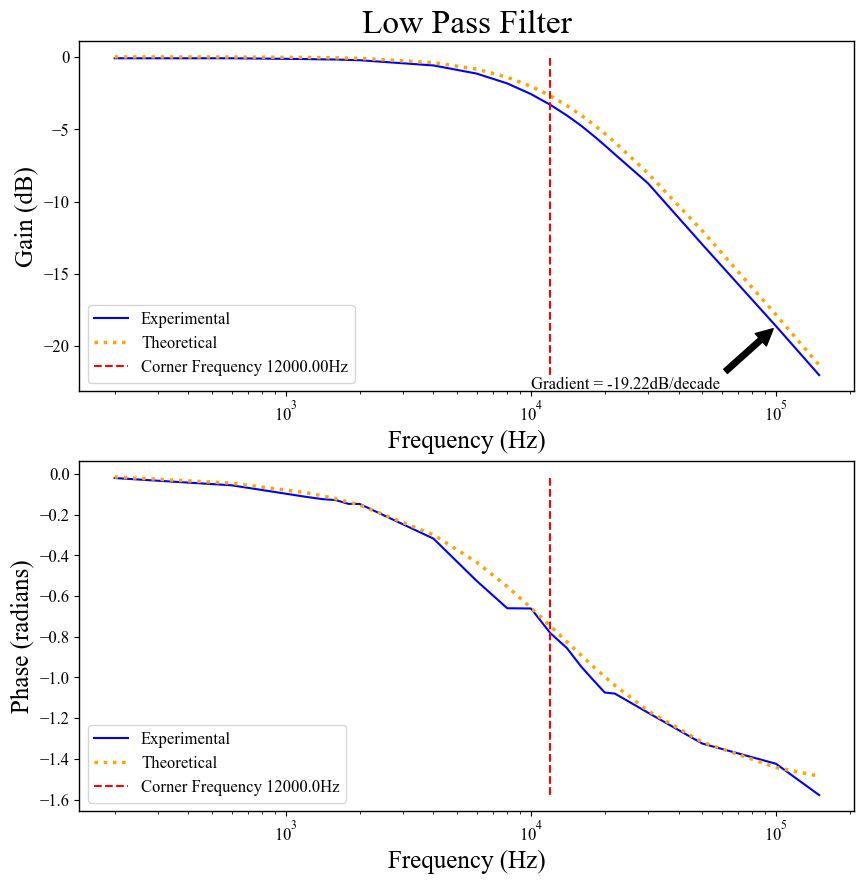

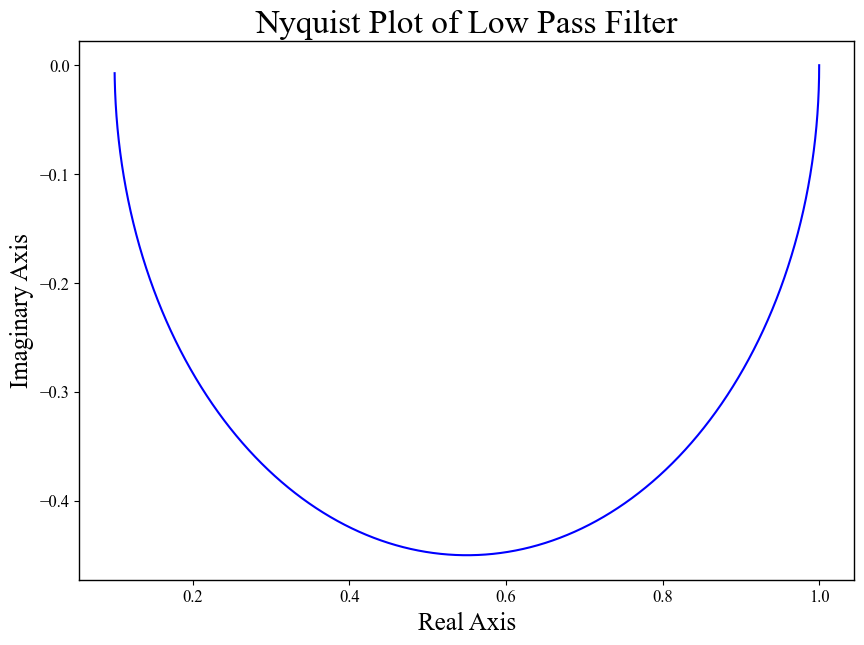

In [27]:
def arctan(x,r,c): #function to calculate the phase of a filter
    return -np.arctan(x*r*c)

def corner_freq(x,y): #function to calculate the corner frequency of a filter which is defined as the point where the gain is -3dB
    return np.full_like(y,x[np.argmin(np.abs(y+3))])

def gradient(x,y): #function to calculate the gradient of a graph
    return np.gradient(x,y)

lp_resistance = 15000 #resistance and capacitance values for the low pass filter
lp_capacitance = 0.82e-9

log_lp_gain = 20*np.log10(lp_peak_to_peak)                                                      #calculates the gain in dB for the low pass filter
lp_omega = (lp_freq*2*np.pi)                                                                    #converts the frequency to angular frequency
log_lp_omega = np.log10(lp_omega)                                                               #calculates the log of the angular frequency
log_lp_theo_gain = 20*np.log10(1/np.sqrt(1+(lp_omega*lp_resistance*lp_capacitance)**2))         #calculates the theoretical gain in dB for the low pass filter
lp_theo_phase = arctan(lp_omega,lp_resistance,lp_capacitance)                                   #calculates the theoretical phase for the low pass filter
lp_corner_freq = corner_freq(lp_freq,log_lp_gain)                                               #calculates the corner frequency for the low pass filter


plt.figure(figsize=(10,10))                                                                     #plots the low pass filter bode plots of gain and phase
plt.subplot(2,1,1)
plt.plot(lp_freq,log_lp_gain, label = 'Experimental', color = 'blue')
plt.plot(lp_freq,log_lp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,log_lp_gain, label = f'Corner Frequency {lp_corner_freq[0]:.2f}Hz', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_lp_gain,log_lp_omega)[-1]:.2f}dB/decade', xy = (lp_freq[-2],log_lp_gain[-2]), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (lp_freq[-2]-90000,log_lp_gain[-2]-4.3))
plt.xlabel(r'Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot(lp_freq,lp_phase, label = 'Experimental', color = 'blue')
plt.plot(lp_freq,lp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,lp_phase, label = f'Corner Frequency {lp_corner_freq[0]}Hz', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel(r'Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.legend(loc= 3)
plt.show()

                                # Nyquist Plot of Low Pass Filter
tau = lp_resistance*lp_capacitance;
a = 10;
lp_trans_func = signal.lti([tau, 1],[a*tau, 1])                 #Creating Transfer Function for a Linear Time Independent system
w= np.linspace(1e-4,1e6,1000000)                               #Creating a range of frequencies to plot the frequency response

w, H = signal.freqresp(lp_trans_func,w)
plt.figure(figsize=(10,7))
plt.plot(H.real, H.imag, "b")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.title("Nyquist Plot of Low Pass Filter")


plt.show()


The graph for the gain response of the low pass filter against frequency shows a clear resembalance of the theoretical data with a slight horizontal offset this is due to the experimental data falling away from a gain of 0dB early due to some uncertainty in the component values and the inability to be able to achaive a perfet gain of 0dB up until the corner frequency. The corner frequency as calculated from the experimental data is $f_c = 12k\Omega$ which is very close to the theoretical value of $f_c = 12.9k\Omega$. This discrepency is due to both uncertainties in the component values, some internal resistance of the circuit that isnt being measured as well as the fact that not enough data points were taken around this corner frequency to get a smoother curve and a more accurate value. Finally for this graph the slope of the gain response past the corner frequency is $-19.22dB/decade$ which is very close to the theoretical value of $-20dB/decade$ and once again this is due to the same reasons as the discrepency in the corner frequency.
The phase, frequency plot for the low pass filter is very accurate apart from not being a nice continous curve due to not enough data points being taken, but this would easily be improved upon had more time been dedicated to this section.
And finally the nyquist plot for the low pass filter follows the shape that would be expected for a low pass filter with the phase starting at 0 and increasing to $\pi$ as the frequency increases.

## Task 2 - Single pole high pass filter

### Task 2.1 - Deriving the transfer function of a single pole high pass filter

To calculate the transfer function (G) of a single pole high pass filter we can start from the definition of the transfer function:

$$G = \frac{V_{out}}{V_{in}} = \frac{Z_2}{Z_1+Z_2}$$

and using the circuit diagram of a single pole high pass filter we can see that:

$$Z_1 = \frac{1}{j\omega C}$$

$$Z_2 = R$$

where j is the imaginary unit and $\omega$ is the angular frequency of the input signal. Substituting these values into the transfer function we get:

$$G = \frac{R}{j\omega RC+1}$$

The gain of the circuit is the magnitude of the transfer function and the phase is the argument of the transfer function. The gain is given by:

$$|G| = \frac{R}{\sqrt{1+(\omega RC)^2}}$$

and the phase is given by:

$$\angle G = -\arctan(\omega RC)$$

### Task 2.2 - Constructing the single pole high pass filter

The circuit diagram for the single pole high pass filter is shown below:



using this circuit diagram the single pole high pass filter was constructed on a breadboard picking resistance and capaccitance values to give a corner frequency as close to 1kHz as possible (these values were $R = 156k\Omega$ and  $C = 0.82nF$). Thus giving a theoretical corner frequency of 

$$f_c = \frac{1}{2\pi RC} = \frac{1}{2\pi * 1.56\times10^5 * 0.82\times10^{-9}} = 1.24k\Omega$$

### Task 2.3 - Measuring and analysing the gain and phase response of the single pole high pass filter

To measure the gain and phase response of the isngle pole high pass filter the same method was employed as with section 1.3. The code to do this is shown below along with the output graphs.

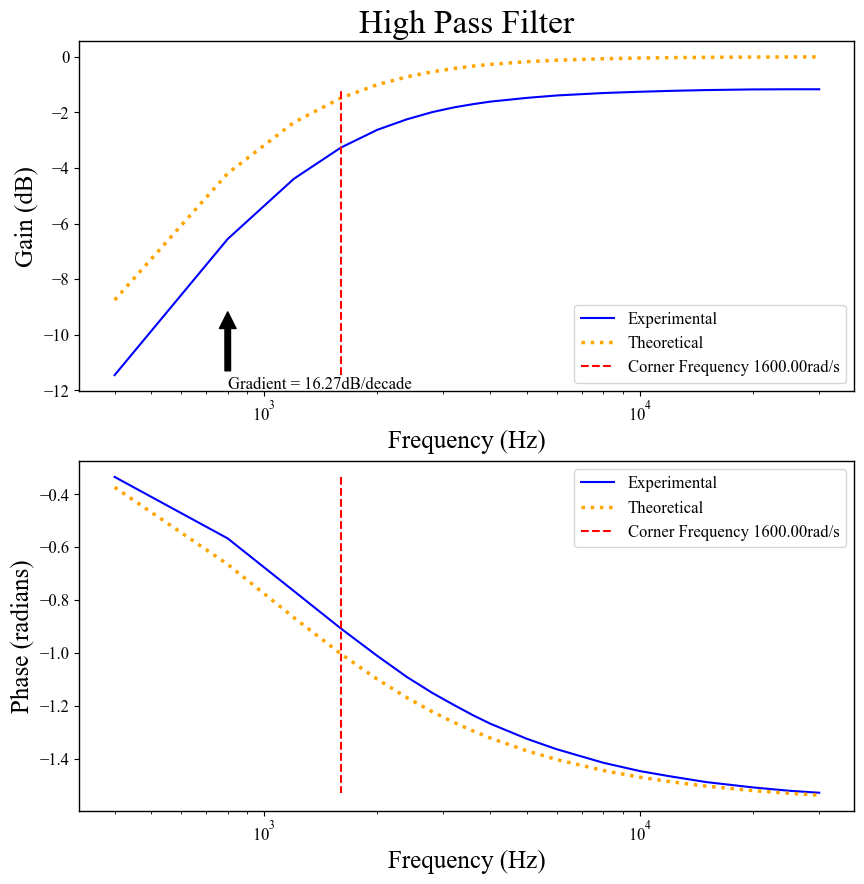

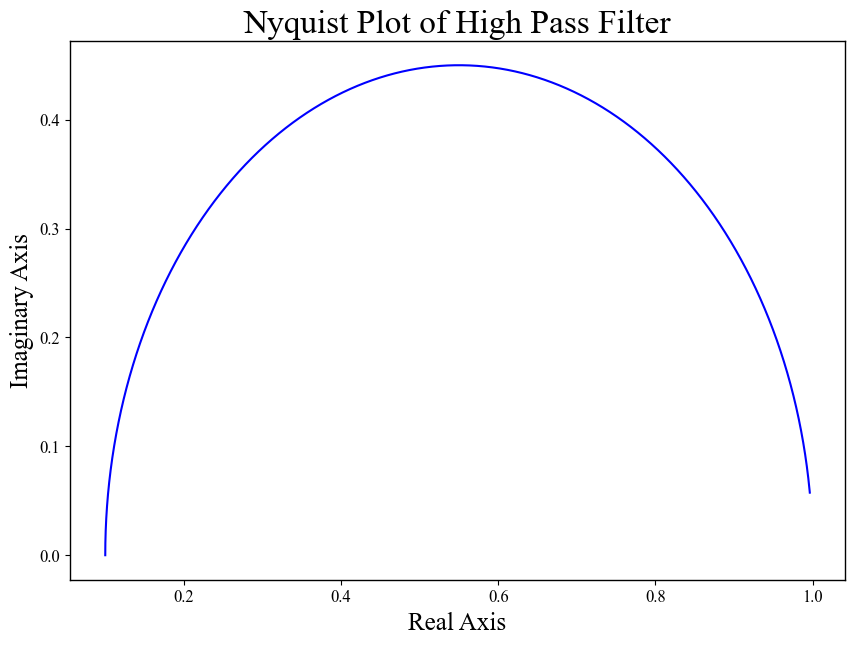

In [28]:
hp_resistance = 156000  # resistance and capacitance values for the high pass filter
hp_capacitance = 1e-9

log_hp_gain = 20*np.log10(hp_peak_to_peak)                                                    #calculates the gain in dB for the high pass filter
hp_omega = (hp_freq*2*np.pi)                                                                  #converts the frequency to angular frequency
log_hp_omega = np.log10(hp_omega)                                                             #calculates the log of the angular frequency
log_hp_theo_gain = 20*np.log10(hp_omega*hp_resistance*hp_capacitance/(np.sqrt(1+(hp_omega*hp_resistance*hp_capacitance)**2))) #calculates the theoretical gain in dB for the high pass filter
hp_theo_phase = arctan(hp_omega,hp_resistance,hp_capacitance)                                #calculates the theoretical phase for the high pass filter
hp_corner_freq = corner_freq(hp_freq,log_hp_gain)                                            #calculates the corner frequency for the high pass filter


plt.figure(figsize=(10,10))                                                                  #plots the high pass filter bode plots of gain and phase
plt.subplot(2,1,1)
plt.plot(hp_freq,log_hp_gain, label = 'Experimental', color = 'blue')
plt.plot(hp_freq,log_hp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,log_hp_gain, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_hp_gain,log_hp_omega)[0]:.2f}dB/decade', xy = (hp_freq[1]-0.165,log_hp_gain[1]-2.5), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (hp_freq[1]+0.1,log_hp_gain[1]-5.4))
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('High Pass Filter')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hp_freq,hp_phase, label = 'Experimental', color = 'blue')
plt.plot(hp_freq,hp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,hp_phase, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()


                                                # Nyquist Plot of High Pass Filter
tau = hp_resistance*hp_capacitance;
a = 10;
hp_trans_func = signal.lti([tau, 1],[tau, a])                 #Creating Transfer Function for a Linear Time Independent system
w= np.linspace(1e-4,1e6,1000000)                               #Creating a range of frequencies to plot the frequency response

w, H = signal.freqresp(hp_trans_func,w)
plt.figure(figsize=(10,7))
plt.plot(H.real, H.imag, "b")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.title("Nyquist Plot of High Pass Filter")


plt.show()


For the Gain as a function of frequency plot for the single pole high pass filter the data as displayed above was acquired using the oscilloscope tool as described in section 1.3 taking readings manually and inputing the values into a .csv file to be used in python. This produced the given plots above which show the correct trend for gain as a function of frequency however there is some vertical offset as the experimental data never reaches 0dB. This could be due to errors in the component values,however it seems more likely to be a form of systematic error introduced by the moku device and connections as it is a constant off set for all frequencies. The corner frequency was once again calculated as with the low pass filter as the point where the gain reaches -3dB and this was found to be $f_c = 1.6k\Omega$ which is very close to the theoretical value of $f_c = 1.24k\Omega$. This difference in the corner frequency is due to the offset of the experimetal data as mentioned above as starting at a lower value for the gain of high frequencies and sweeping down will result in the -3dB point occuring at a higher frequency than expected. The slope of the gain as a function of frequency for the low frequencies up to the corner frequency gave a value of $+16.27dB/decade$ wich is close to the expected value of $+20dB/decade$, this difference could be due to not enough data points being taken around this region of the frequency and could be improved by doing so. The phase plot for the High pass filter follows the same trend as the theoretical once again with a phase differnce going from 0 to $-\pi$ as the frequency increases and the corner frequency at approximately $\frac{-\pi}{2}$. The nyquist plot for the high pass filter follows the same trend as the low pass filter with the phase starting at 0 and increasing to $\pi$ as the frequency increases but this time in the positive region of the Imaginary axis.

### Task 2.4 - Obtaining a calibration curve for the Frequency response of the MOKU:GO
In the next couple of sections of task 2 we will want to compare the MOKU:GO oscilloscope program to the Frequency Response Analyser and to do so it is important to obtain a base reading opf the MOKU:GO itself to have the ability to calibrate the Frequency Response Analyser. To do this the MOKU:GO input and output BNC connecters were short circuited and the resulting signal measuered and output by the Frequency Response Analyser. The code to do this is shown below along with the output graphs.

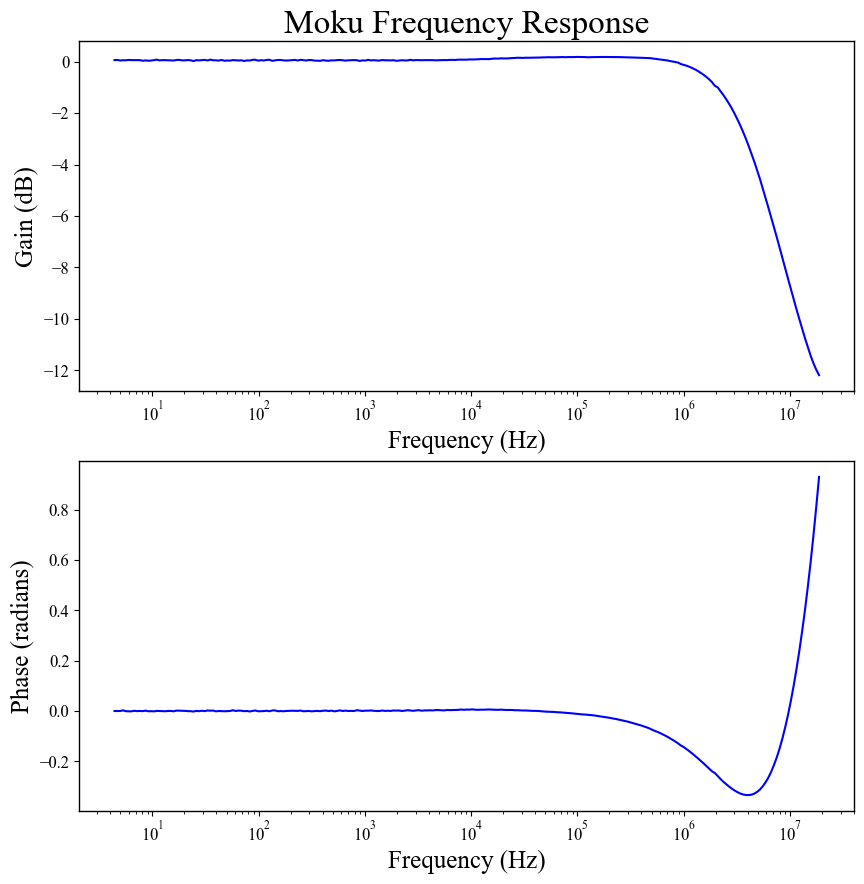

In [29]:
def load_data(file):   #function to load in the data from a csv file
    data = pd.read_csv(file, delimiter = ',', skiprows = 2)
    data.columns = ['freq','gain','phase']
    data['phase'] = float_array_convert(data['phase'])*(np.pi/180)
    return data

moku_feedback = load_data('data/moku_csv/moku_itself_data.csv') #loads in the data from the moku device that is used to measure any errors that the moku device itself introduces

plt.figure(figsize=(10,10))                                   #plots the bode plots of gain and phase for the moku device
plt.subplot(2,1,1)
plt.plot((moku_feedback['freq']),moku_feedback['gain'], color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('Moku Frequency Response')

plt.subplot(2,1,2)
plt.plot((moku_feedback['freq']),moku_feedback['phase'], color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.show()


From the Gain against Frequency graph above it can be seen that for frequencies in the range 0-500kHz the gain is very close to 0dB and can be accepted as a negligible error for values in this region, however, above the 500kHz point the device starts producing some background noise decreasing sharply not long after the 1MHz region giving this range significant noise and readings cant be used until this noise has been removed. The phase against frequency graph shows a similar trend with the phase being very close to 0 in the 0-500kHz region and then increasing sharply to $\pi$ in the 1MHz region.


### Task 2.5 - Comparing the single pole high pass filter analysis using the Oscilloscope and the Frequency Response Analyser

In this task the high pass filter results from the Oscilloscope tool and the Frequency Response Analyser were plotted on the same Gain and Phase graphs to obtain a comparison between the two. The MOKU:GO frequency response was also included here to show how it effects the frequency response of the high pass filter. The code to do this is shown below along with the output graphs.

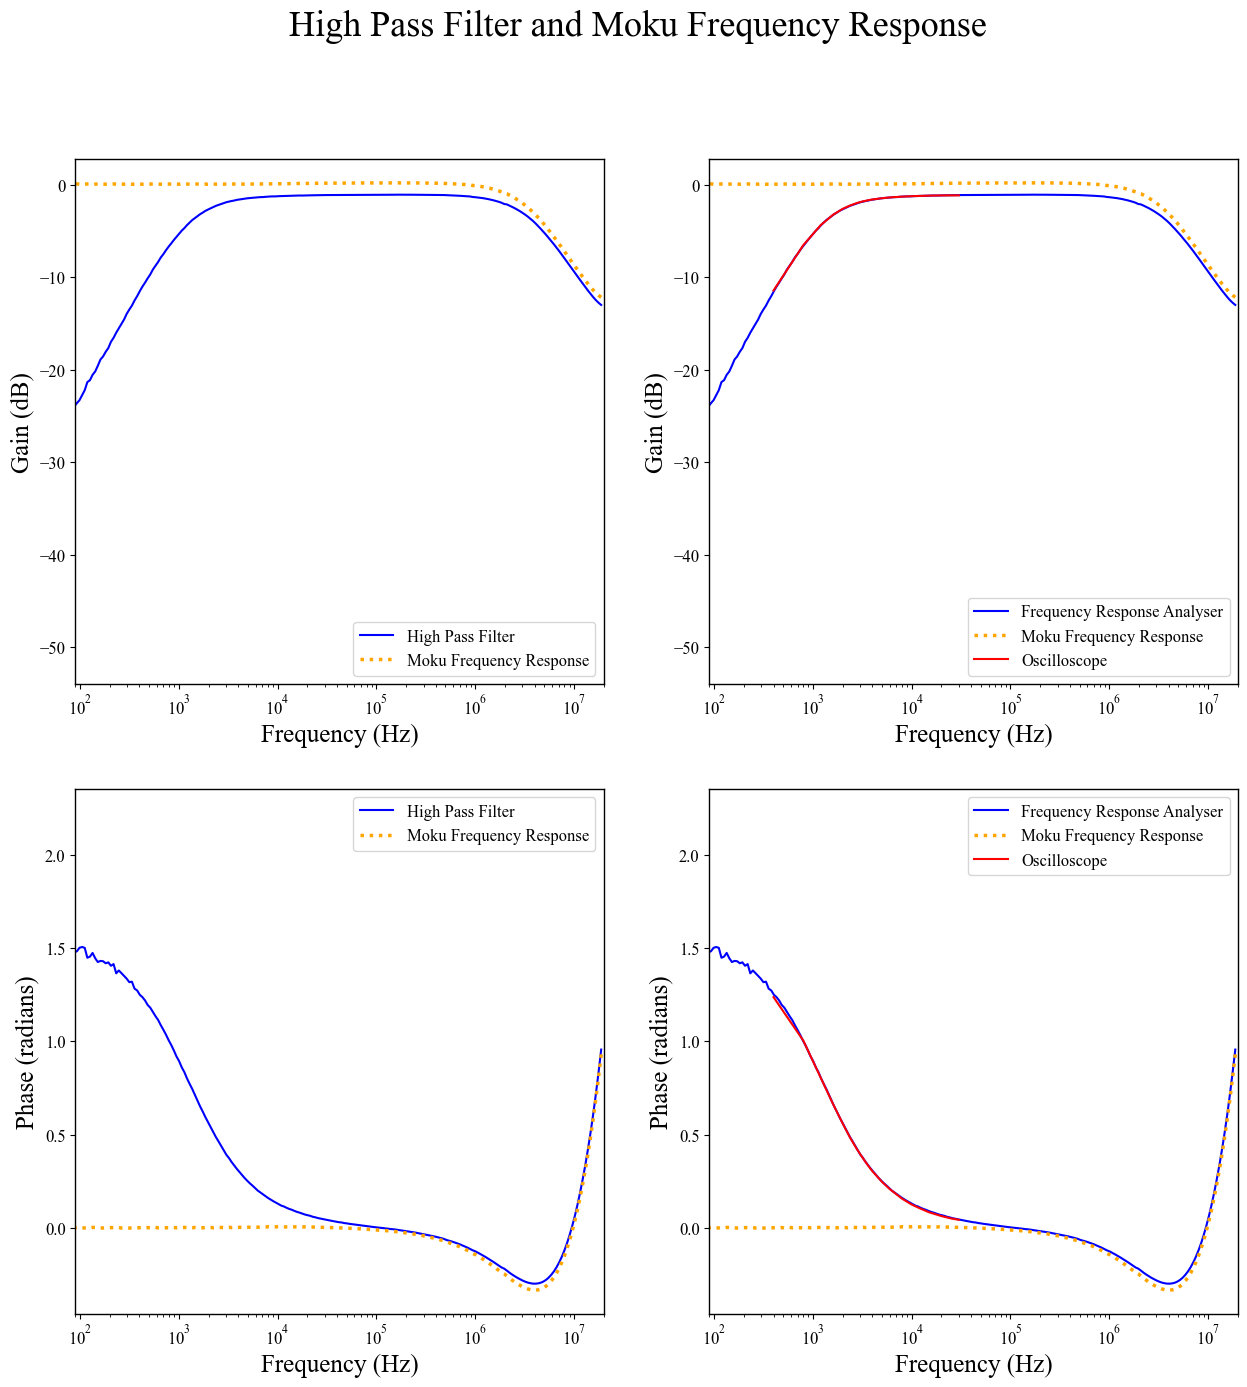

In [30]:

hp_freq_res = load_data('data/moku_csv/HP_freq_res_data.csv') #loads in the data from the moku device that is used to measure the frequency response of the high pass filter

plt.figure(figsize=(15,15))                                #plots the bode plots of gain and phase for the high pass filter and the moku device
plt.subplot(2,2,1)
plt.plot((hp_freq_res['freq']),hp_freq_res['gain'], label = 'High Pass Filter', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Frequency Response', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Gain (dB)')
plt.suptitle('High Pass Filter and Moku Frequency Response', fontsize = 26)
plt.legend(loc =4)

plt.subplot(2,2,3)
plt.plot((hp_freq_res['freq']),hp_freq_res['phase'], label = 'High Pass Filter', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Frequency Response', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Phase (radians)')
plt.legend()


plt.subplot(2,2,2)
plt.plot((hp_freq_res['freq']),hp_freq_res['gain'], label = 'Frequency Response Analyser', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Frequency Response', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_freq,log_hp_gain, label = 'Oscilloscope', color = 'red')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Gain (dB)')

plt.legend(loc =4)

plt.subplot(2,2,4)
plt.plot((hp_freq_res['freq']),hp_freq_res['phase'], label = 'Frequency Response Analyser', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Frequency Response', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_freq,hp_phase+np.pi/2, label = 'Oscilloscope', color = 'red')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()


First from the graphs above it can be seen that in the regions where the Requency response of the MOKU:GO has a value of 0 it doesnt effect the frequency response of the high pass filter attached, however as the frequency aproaches the 1MHz region the MOKU:GO noise dominates the graphs and no useful results can be obtained from this region. When the results from the Oscilloscope and the Frequency Response Analyser are plotted on the same graph it can be seen that the results for the overlapping region are almost identical and therefore the use of either method produces suitable results for analysing the frequency response of a given filter, however the Frequency Response Analyser was easier to use as it ootputs an few arrays of gain, phase and frequency and allows for easier analysis in python, whereas the Oscilloscope relied on values being read off of the graphs, this is more challenging to acheive accurate results from and is more time consuming.


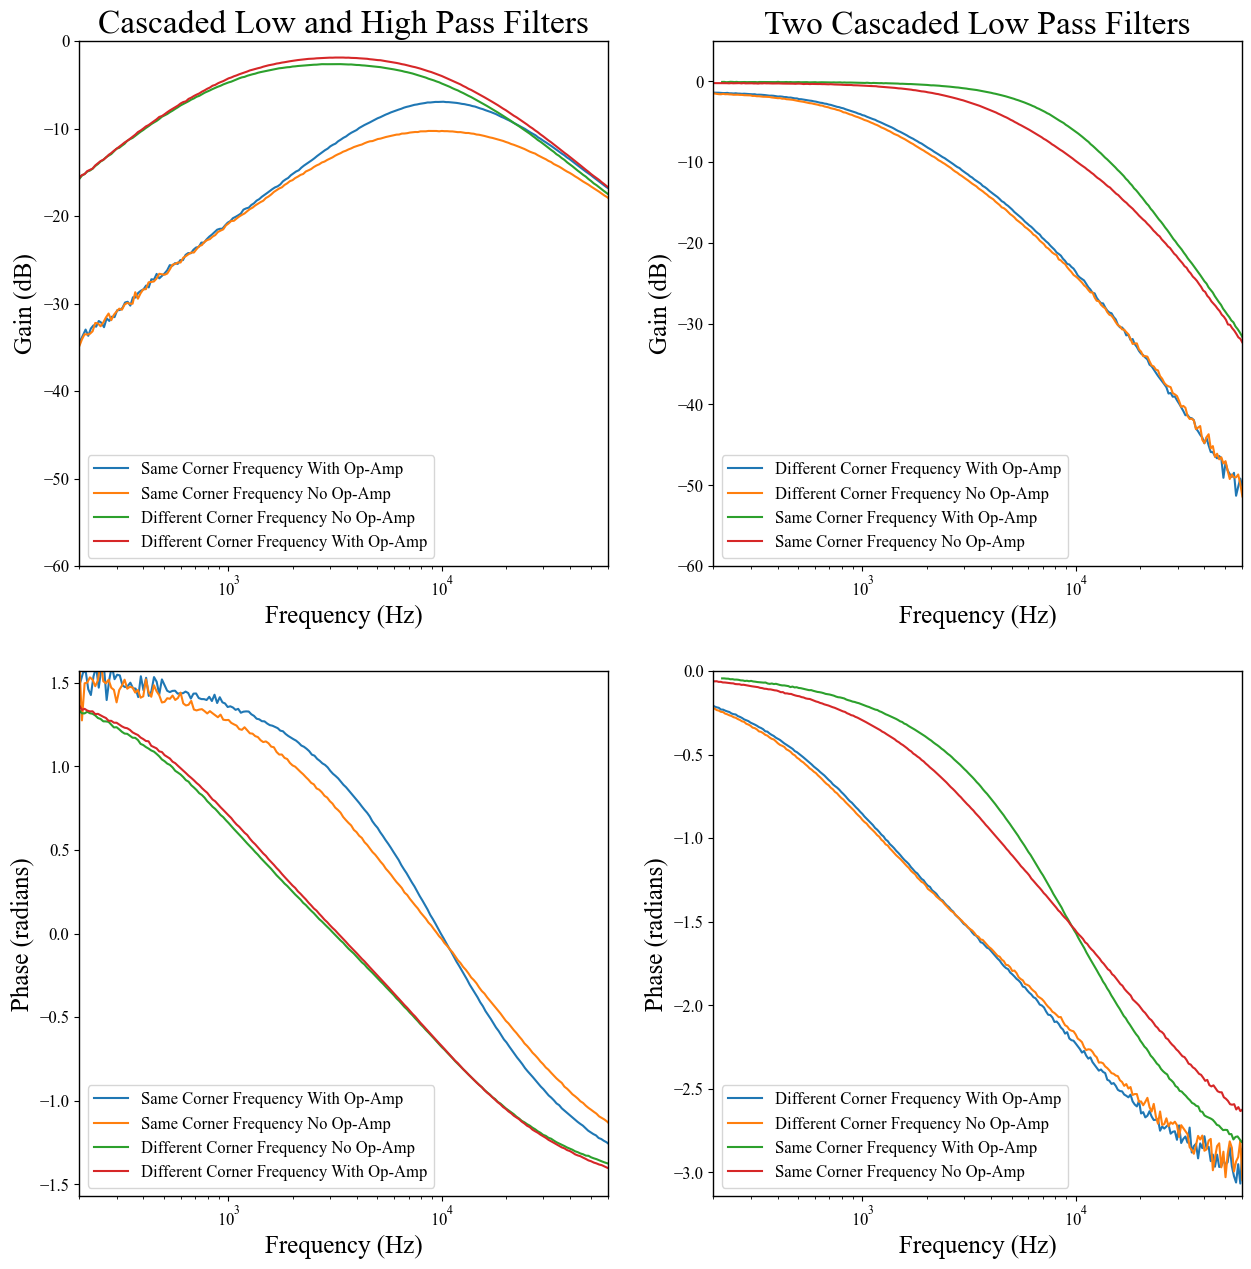

In [31]:
Path = 'data/moku_csv/'                 #path to the directory of the csv files
plt.figure(figsize=(15,15))
files = os.listdir(Path)                #creates a list of all files in the directory

for file in files:                      #loops through all files in the directory
    if re.search('high',file):          #filter to only include the cascade low and high pass filter files

        data = load_data(Path+file)
        labels = (pd.read_csv(Path+file,nrows = 0)).columns[0]

        plt.subplot(2,2,1)              #plots the bode plots of gain and phase for the cascaded low and high pass filter
        plt.plot((data['freq']),data['gain'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-60,0)
        plt.ylabel('Gain (dB)')
        plt.title('Cascaded Low and High Pass Filters')
        plt.legend()

        plt.subplot(2,2,3)
        plt.plot((data['freq']),data['phase'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-np.pi/2,np.pi/2)
        plt.ylabel('Phase (radians)')
        plt.legend()


    elif file.startswith('casc_lowpass'): #filter to only include the 2 cascaded low pass filter files

        data = load_data(Path+file)
        labels = (pd.read_csv(Path+file,nrows = 0)).columns[0]

        plt.subplot(2,2,2)                #plots the bode plots of gain and phase for the 2 cascaded low pass filter
        plt.plot((data['freq']),data['gain'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-60,5)
        plt.ylabel('Gain (dB)')
        plt.title('Two Cascaded Low Pass Filters')
        plt.legend()

        plt.subplot(2,2,4)
        plt.plot((data['freq']),data['phase'],label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-np.pi,0)
        plt.ylabel('Phase (radians)')
        plt.legend()
plt.show()


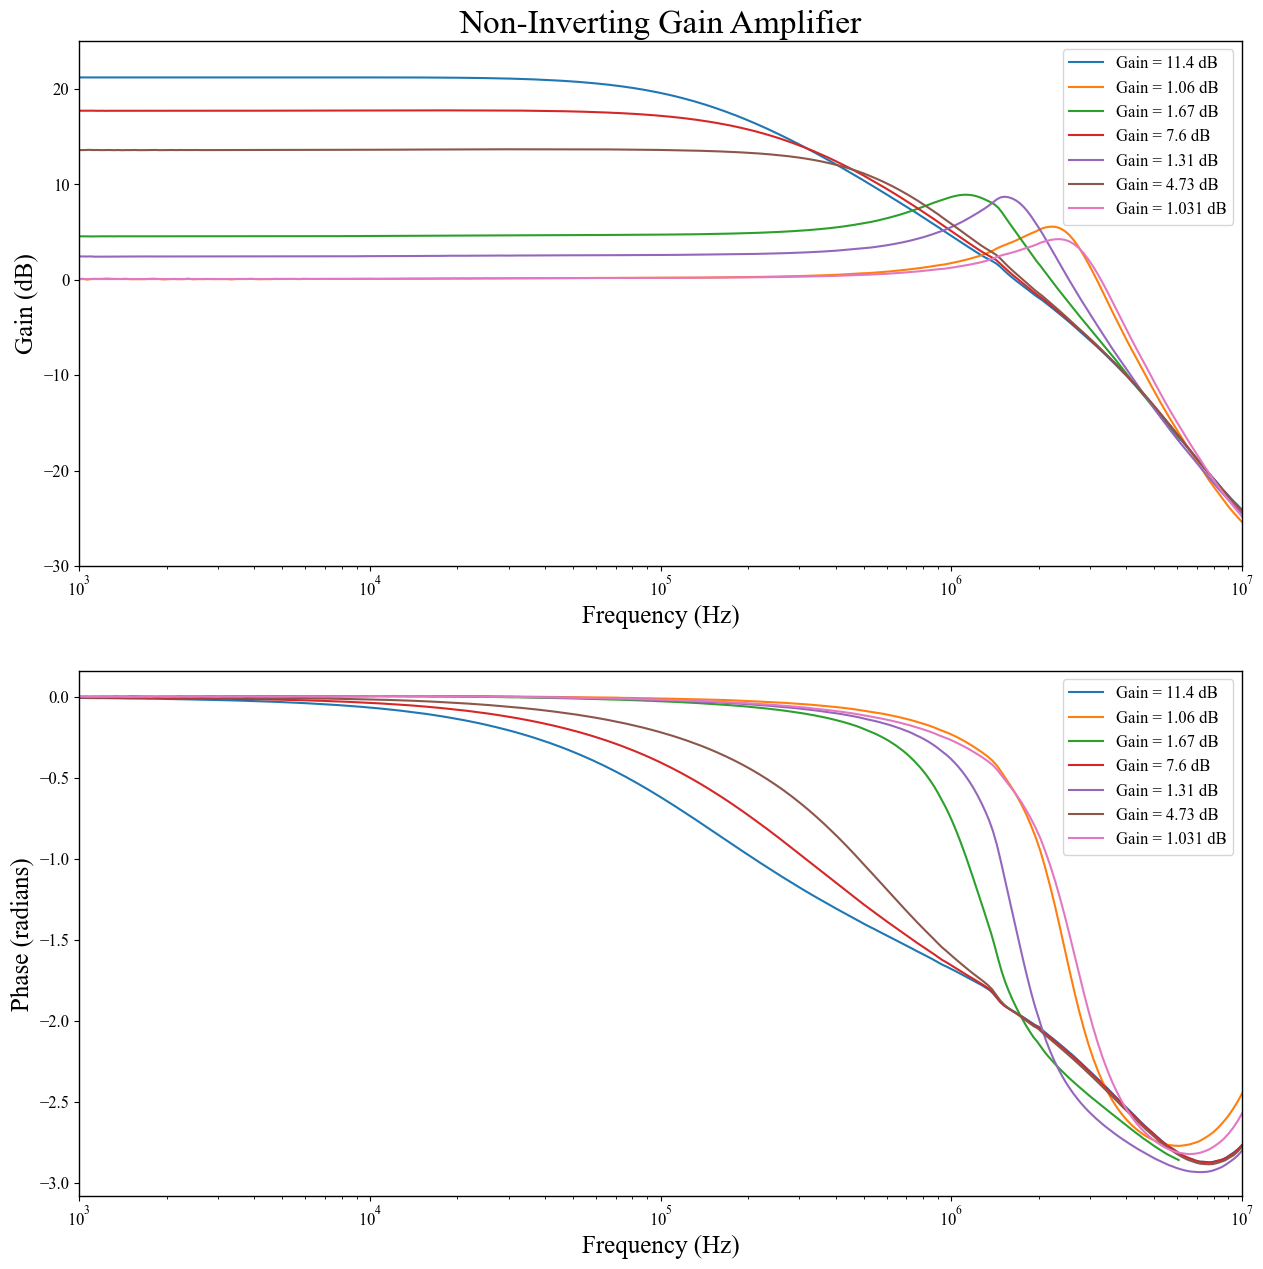

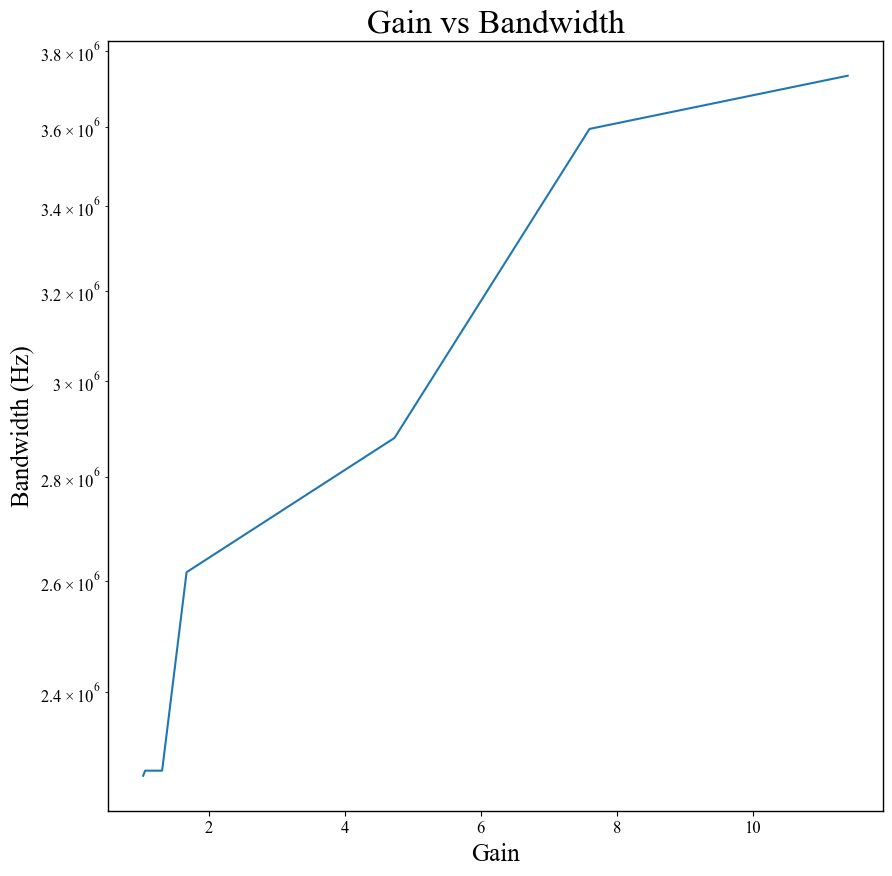

In [32]:
plt.figure(figsize=(15,15))
files = os.listdir(Path)

for file in files:                     #loops through all files in the directory
    if file.startswith('non'):         #filter to only include the non inverting amplifier files

        data = load_data(Path+file)
        labels = (pd.read_csv(Path+file,nrows = 0)).columns[0]

        plt.subplot(2,1,1)             #plots the bode plots of gain and phase for the non inverting amplifier
        plt.plot((data['freq']),data['gain'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(1e3,1e7)
        plt.ylim(-30,25)
        plt.ylabel('Gain (dB)')
        plt.title('Non-Inverting Gain Amplifier')
        plt.legend()

        plt.subplot(2,1,2)
        plt.plot((data['freq']),data['phase'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xlim(1e3,1e7)
        plt.xscale('log')
        plt.ylabel('Phase (radians)')
        plt.legend()

def bandwidth_calc(data):               #function to calculate the bandwidth of a non inverting amplifier
    return data['freq'][np.argmin(np.abs(data['gain']+3))]
bandwidth = []
gain = [11.4,1.06,1.67,7.6,1.31,4.73,1.031]
for file in files:                      #loops through all files in the directory
    if file.startswith('non'):          #filter to only include the non inverting amplifier files
        data = load_data(Path+file)
        bandwidth.append(bandwidth_calc(data))

plt.figure(figsize=(10,10))             #plots the bandwidth against the gain for the non inverting amplifier
plt.plot(np.sort(gain),np.sort(bandwidth))
plt.xlabel('Gain')
plt.ylabel('Bandwidth (Hz)')
plt.yscale('log')
plt.title('Gain vs Bandwidth')
plt.show()
